## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

No null values in the dataset and all the columns except Class are PCA transformed

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

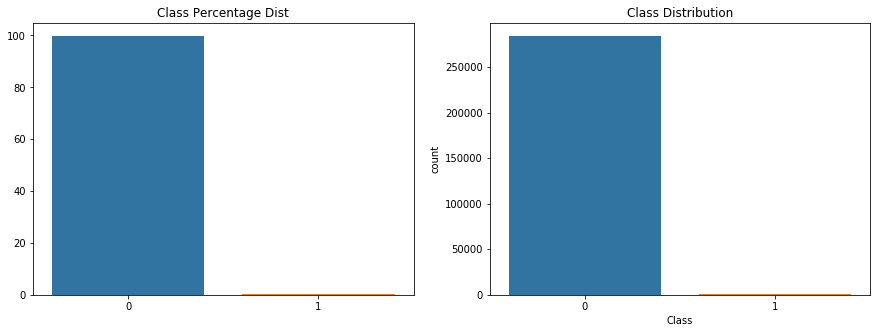

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
percent=[normal_share, fraud_share]
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Class',data=df,ax=ax[1]).set_title('Class Distribution')
sns.barplot(x=df['Class'].value_counts().keys(),y=percent,data=df,ax=ax[0]).set_title('Class Percentage Dist')
plt.show()

So, the class 1 (Fraud transactions) are very less comparing to class 0 (Non-Fraud transactions)

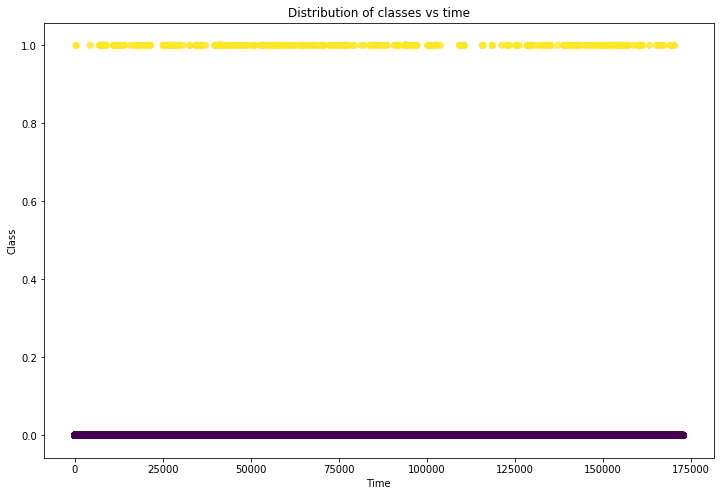

In [6]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(12,8))
plt.scatter(x='Time',y='Class',data=df,c=df['Class'], alpha=0.8)
plt.title('Distribution of classes vs time')
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

From the above plot, we can see that both the classes are distributed with time

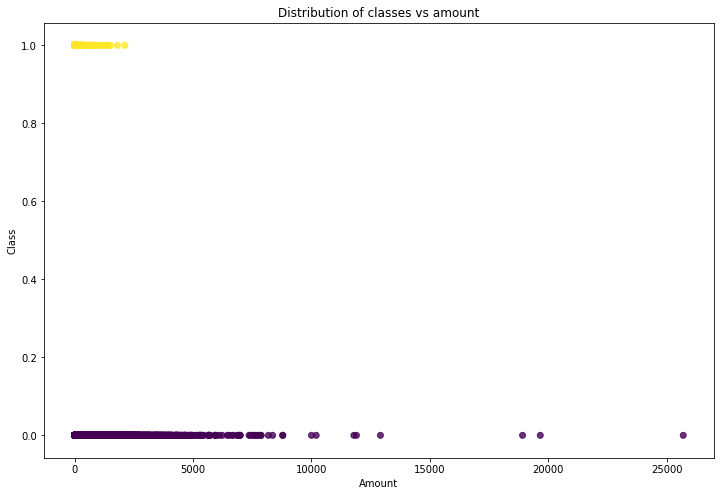

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,8))
plt.scatter(x='Amount',y='Class',data=df,c=df['Class'], alpha=0.8)
plt.title('Distribution of classes vs amount')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

From the above plot, we can see that Fraud transactions mostly happened with an amount less than 5000/-

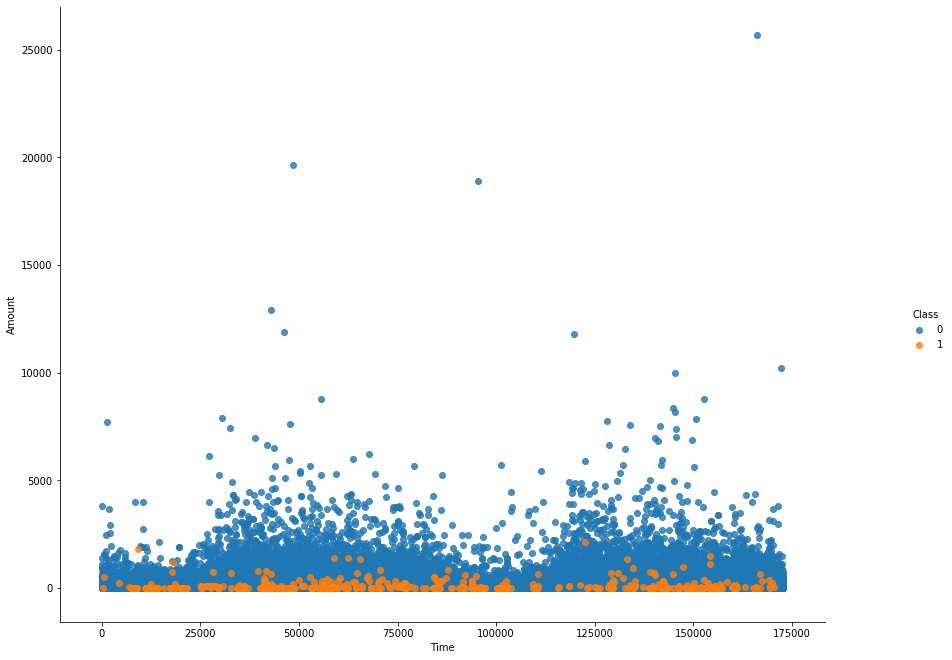

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount and Time
sns.lmplot(x='Time', y='Amount',data=df, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

##### Above plot is speaking below points
- Count of Fraud transactions are very very less compared to Non-Fraud transactions
- Fraud transactions are happening on lower transaction amounts
- Very few correct transactions with highest amounts

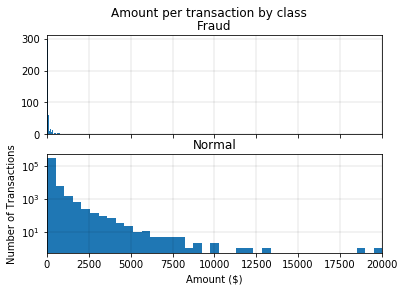

In [9]:
# Create a plot to show amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(df[df.Class == 1].Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(df[df.Class == 0].Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


We can see that Normal has more number of transactions over Amount when compared to Fraud Transactions.

In [10]:
# Drop unnecessary columns
df = df.drop('Time',axis=1)

### Splitting the data into train & test data

In [11]:
y= df.pop('Class') #class variable

While splitting the data, we are using `stratify` just to make sure that both train and test will have equal percentage of classeses 

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df,y, train_size = 0.7, test_size = 0.3, random_state = 100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

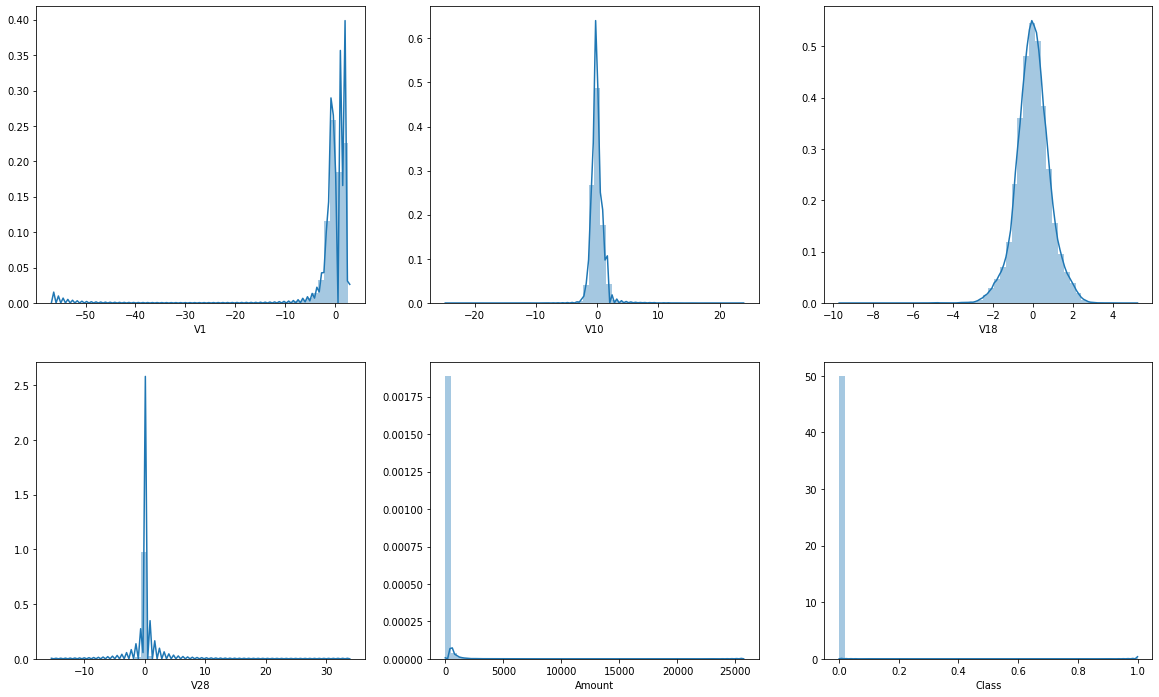

In [14]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['V1'])
plt.subplot(2,3,2)
sns.distplot(df['V10'])
plt.subplot(2,3,3)
sns.distplot(df['V18'])
plt.subplot(2,3,4)
sns.distplot(df['V28'])
plt.subplot(2,3,5)
sns.distplot(df['Amount'])
plt.subplot(2,3,6)
sns.distplot(y)
plt.show()

Although all the features are PCA transformed, we can clearly see skewness from the above plots...

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [15]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
print(pt.fit_transform(X_train))
print(pt.transform(X_test))
print(pt.fit_transform(y_train.values.reshape(-1,1)))
print(pt.transform(y_test.values.reshape(-1,1)))

[[ 1.44569155 -0.17985939 -0.82537101 ... -0.21338865 -0.18593313
  -1.44748939]
 [-0.1685569   0.70771555 -0.415595   ...  0.57666235  0.28299091
  -1.13077718]
 [ 1.54055149  0.05920404 -1.39766213 ... -0.23217377 -0.20541154
  -0.86502161]
 ...
 [ 0.44926405 -0.65653239  0.44059444 ...  0.09733236  0.20682708
   1.18854512]
 [ 0.22075551 -0.98861027  0.05561301 ... -0.18686459  0.25017814
   1.56343857]
 [-0.45562581  0.76260283  0.24868191 ... -0.11534124 -1.54276014
  -1.31557838]]
[[-0.55395099  0.91160093 -0.11928654 ... -0.12977515  0.17955064
   0.90076267]
 [ 0.02609086  1.26869257 -1.43424809 ...  0.29394533 -0.17958052
  -0.43072205]
 [ 1.44914779 -0.05637223 -0.93523866 ... -0.05895154 -0.15948888
  -0.40288819]
 ...
 [ 0.40730679 -0.2662729   0.14250171 ...  0.07984482 -0.00433223
   0.40504099]
 [-1.78794338 -1.85749671  1.25787403 ...  2.06920383  0.27978279
   0.7051672 ]
 [-2.52591184  4.32254435 -3.31579382 ... -3.14361737  0.7478174
   0.81119126]]
[[-0.04157487]
 [

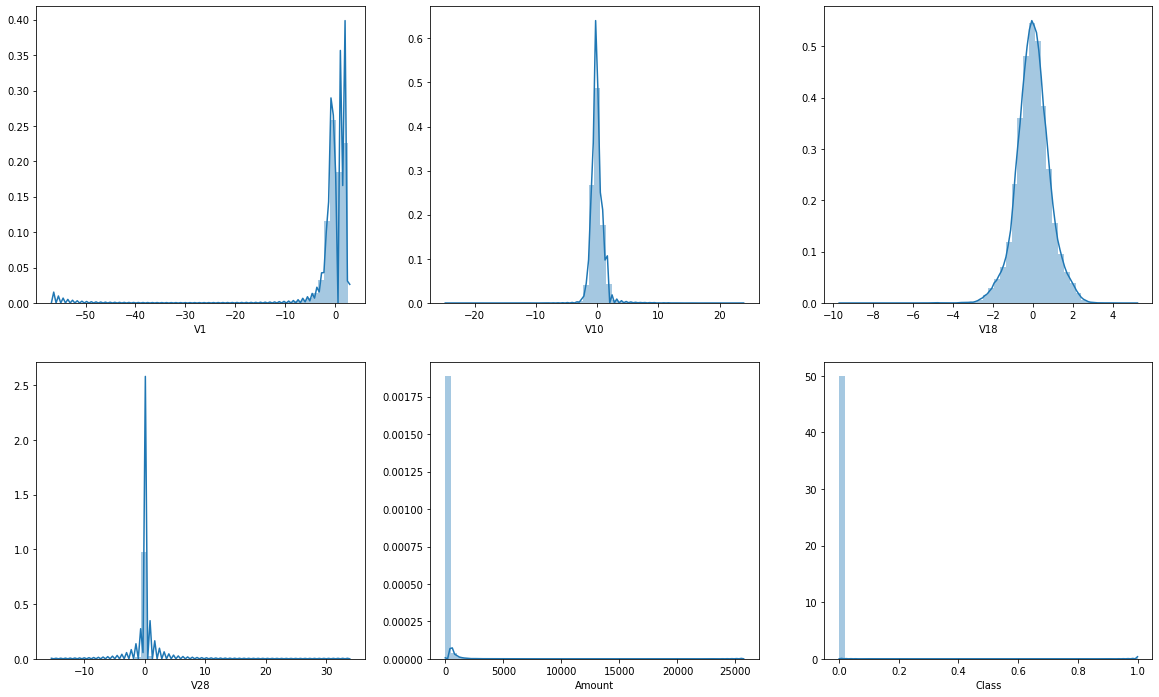

In [16]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['V1'])
plt.subplot(2,3,2)
sns.distplot(df['V10'])
plt.subplot(2,3,3)
sns.distplot(df['V18'])
plt.subplot(2,3,4)
sns.distplot(df['V28'])
plt.subplot(2,3,5)
sns.distplot(df['Amount'])
plt.subplot(2,3,6)
sns.distplot(y)
plt.show()

From the above histograms, it was clear that we have removed skewness using Power Transformers

## Model Building
- Build different models on the imbalanced dataset and see the result

###### Create a function `RandomSearch` to perform RandomizedSearchCV for any model

In [17]:
#imports
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

#Create a function to perform RandomizedSearchCV for any model
def RandomSearch(estimator, hyper_params, X, y):
    cv_num = 3 
    #RandomizedSearchCV
    model = RandomizedSearchCV(estimator,
                               param_distributions=hyper_params,
                               cv = cv_num,
                               verbose = 1,
                               n_jobs = -1,
                               n_iter = 100,
                               error_score = 'raise',
                               return_train_score=True)
    model.fit(X,y)
    return print('Best roc_auc : {:.4}, with best C: {}'.format(model.best_score_, model.best_params_))

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

###### Create a function `StratifiedFolds` to perform StratifiedKFolds and to return predicted metrics for any model

In [18]:
#imports
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

def StratifiedFolds(X, y, model):
    # create folds
    folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=50)
    
    # train model for every fold
    cv_score =[]
    i=1
    for train_idx, test_idx in folds.split(X,y):
        print('{} of KFold {}'.format(i,folds.n_splits))
        X_train_cv = X.iloc[list(train_idx)]
        y_train_cv = y.iloc[list(train_idx)]
        X_test_cv = X.iloc[list(test_idx)]
        y_test_cv= y.iloc[list(test_idx)]
    
        model.fit(X_train_cv,y_train_cv)
        score = metrics.roc_auc_score(y_test_cv,model.predict(X_test_cv))
        print('ROC AUC score: {:.4}'.format(score))
        cv_score.append(score)
        i+=1
    print('\nMean ROC AUC score: {:.4}'.format(np.mean(cv_score)))
    
    #predict probability on train_cv
    y_pred = model.predict_proba(X_train_cv)
    print("\nRoc for y_train_cv vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_train_cv,y_pred[:,1])))
    
    
    #predict probability on test_cv
    y_pred = model.predict_proba(X_test_cv)
    print("\nRoc for y_test_cv vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_test_cv,y_pred[:,1])))
    
    preds=model.predict(X_test_cv)
    
    #Classification report and Confusion matrix
    print(classification_report(y_test_cv,preds))
    print(pd.DataFrame(confusion_matrix(y_test_cv, preds),
                 columns=['Predicted Non-Fraud', 'Predicted Fraud'],
                 index=['Actual Non-Fraud', 'Actual Fraud']))

##### Let's build a model with Logistic Regression

In [19]:
#import model
from sklearn.linear_model import LogisticRegression

#define model
lr = LogisticRegression(solver='liblinear')

#define hyper_parameters
num_C = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,5,10,100,1000]  #--> list of values
hyper_params = {'C':num_C, 'penalty':['l1','l2']}

#call RandomSearch function
RandomSearch(lr,hyper_params,X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  1.5min finished


Best roc_auc : 0.9993, with best C: {'penalty': 'l1', 'C': 0.5}


In [20]:
#Use the best parameters of the model obtained and do cross-validation
lr=LogisticRegression(penalty= 'l1', C= 0.5, solver='liblinear')
StratifiedFolds(X_train,y_train,lr)

1 of KFold 3
ROC AUC score: 0.8173
2 of KFold 3
ROC AUC score: 0.8521
3 of KFold 3
ROC AUC score: 0.8333

Mean ROC AUC score: 0.8342

Roc for y_train_cv vs y_pred for your model: 0.9852


Roc for y_test_cv vs y_pred for your model: 0.9724

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66340
           1       0.87      0.67      0.76       114

    accuracy                           1.00     66454
   macro avg       0.94      0.83      0.88     66454
weighted avg       1.00      1.00      1.00     66454

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud                66329               11
Actual Fraud                       38               76


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

##### Let's build a model with Random Forests

In [21]:
#import model
from sklearn.ensemble import RandomForestClassifier

#define model
rf = RandomForestClassifier(warm_start=True,n_estimators=300)

#define hyper_parameters
hyper_params = {'max_depth':[9,21],'min_samples_leaf':[1,5],'min_samples_split':[2,8]}

#call RandomSearch function
RandomSearch(rf,hyper_params,X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 33.3min finished


Best roc_auc : 0.9995, with best C: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 21}


In [22]:
#Use the best parameters of the model obtained and do cross-validation
rf=RandomForestClassifier(min_samples_split= 2, min_samples_leaf= 1, max_depth= 21,warm_start=True,n_estimators=300)
StratifiedFolds(X_train,y_train,rf)

1 of KFold 3
ROC AUC score: 0.8652
2 of KFold 3
ROC AUC score: 1.0
3 of KFold 3
ROC AUC score: 1.0

Mean ROC AUC score: 0.9551

Roc for y_train_cv vs y_pred for your model: 0.9809


Roc for y_test_cv vs y_pred for your model: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66340
           1       1.00      1.00      1.00       114

    accuracy                           1.00     66454
   macro avg       1.00      1.00      1.00     66454
weighted avg       1.00      1.00      1.00     66454

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud                66340                0
Actual Fraud                        0              114


##### Let's build a model with XG Boosting

In [ ]:
#import model
from xgboost import XGBClassifier
#from xgboost.xgbclassifier import XGBClassifier
#define model
xgb = XGBClassifier()

#perform hyperparameter tuning
hyper_params = {'n_estimators': [100],'min_child_weight': [1, 5, 10], 'gamma': [1, 2, 5], 
                'learning_rate':[0.001, 0.01, 0.1],'max_depth': [7, 14, 21]}

#call RandomSearch function
RandomSearch(xgb,hyper_params,X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.1min


In [ ]:
#Use the best parameters of the model obtained and do cross-validation
xgb=XGBClassifier(n_estimators= 100, min_child_weight= 1, max_depth=14, learning_rate=0.1, gamma=2)
StratifiedFolds(X_train,y_train,xgb)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

XGB Classifier provided best AOC metrics.. So, applying that model to predict on test dataset

In [ ]:
clf = XGBClassifier(n_estimators= 100, min_child_weight= 1, max_depth=14, learning_rate=0.1, gamma=2)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#predict probability on train_cv
y_pred = clf.predict_proba(X_train)
print("\nRoc for y_train vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_train,y_pred[:,1])))
    
    
#predict probability on test_cv
y_pred = clf.predict_proba(X_test)
print("\nRoc for y_test vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_test,y_pred[:,1])))
    
preds=clf.predict(X_test)
    
#Classification report and Confusion matrix
print(classification_report(y_test,preds))
print(pd.DataFrame(confusion_matrix(y_test, preds),
                 columns=['Predicted Non-Fraud', 'Predicted Fraud'],
                 index=['Actual Non-Fraud', 'Actual Fraud']))
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages
random_os = over_sampling.RandomOverSampler(sampling_strategy='minority')
X_train_os, y_train_os = random_os.fit_resample(X_train,y_train)
print(dict(y_train.value_counts(sort=False)))
print(dict(y_train_os.value_counts(sort=False)))

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

##### Let's build a model with Logistic Regression

In [ ]:
#import model
from sklearn.linear_model import LogisticRegression

#define model
lr_os = LogisticRegression(solver='liblinear')

#define hyper_parameters
num_C = [0.001,0.003,0.005,0.01,0.03, 0.1,0.3,0.5,1,5,10,100,1000]  #--> list of values
hyper_params = {'C':num_C, 'penalty':['l1','l2']}

#call RandomSearch function
RandomSearch(lr_os,hyper_params,X_train_os,y_train_os)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
lr_os=LogisticRegression(penalty= 'l2', C= 0.3,solver='liblinear')
StratifiedFolds(X_train_os,y_train_os,lr_os)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

##### Let's build a model with Random Forest

In [ ]:
#import model
from sklearn.ensemble import RandomForestClassifier

#define model
rf_os = RandomForestClassifier(warm_start=True,n_estimators=300)

#define hyper_parameters
hyper_params = {'max_depth':[9,21], 'min_samples_leaf':[1,5],'min_samples_split':[2,8]}

#call RandomSearch function
RandomSearch(rf_os,hyper_params,X_train_os,y_train_os)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
rf_os=RandomForestClassifier(min_samples_split= 8, min_samples_leaf= 1, max_depth= 21,warm_start=True,n_estimators=300)
StratifiedFolds(X_train_os,y_train_os,rf_os)

##### Let's build a model with XG Boosting

In [ ]:
#import model
from xgboost import XGBClassifier

#define model
xgb_os = XGBClassifier(n_estimators=200,gamma=2)

#perform hyperparameter tuning
hyper_params = {'min_child_weight': [1, 5],'learning_rate':[0.1,1],'max_depth': [8,16]}

#call RandomSearch function
RandomSearch(xgb_os,hyper_params,X_train_os,y_train_os)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
xgb_os=XGBClassifier(min_child_weight= 1, max_depth= 8, learning_rate= 0.1,n_estimators=200,gamma=2)
StratifiedFolds(X_train_os,y_train_os,xgb_os)

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Let's build a model with Logistic Regression

In [ ]:
#import model
from sklearn.linear_model import LogisticRegression

#define model
lr_smote = LogisticRegression(solver='liblinear')

#define hyper_parameters
num_C = [0.001,0.003,0.005,0.01,0.03,0.1,0.3,0.5,1,5,10,100,1000]  #--> list of values
hyper_params = {'C':num_C, 'penalty':['l1','l2']}

#call RandomSearch function
RandomSearch(lr_smote,hyper_params,X_train_smote,y_train_smote)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
lr_smote=LogisticRegression(penalty= 'l1', C= 0.01,solver='liblinear')
StratifiedFolds(X_train_smote,y_train_smote,lr_smote)

##### Build models on other algorithms to see the better performing on SMOTE

##### Let's build a model with Random Forest

In [ ]:
#import model
from sklearn.ensemble import RandomForestClassifier

#define model
rf_smote = RandomForestClassifier(warm_start=True,n_estimators=300)

#define hyper_parameters
hyper_params = {'max_depth':[9,21], 'min_samples_leaf':[1,5],'min_samples_split':[2,8]}

#call RandomSearch function
RandomSearch(rf_smote,hyper_params,X_train_smote,y_train_smote)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
rf_smote=RandomForestClassifier(min_samples_split= 2, min_samples_leaf= 1, max_depth= 21,warm_start=True,n_estimators=300)
StratifiedFolds(X_train_smote,y_train_smote,rf_smote)

##### Let's build a model with XG Boosting

In [ ]:
#import model
from xgboost import XGBClassifier

#define model
xgb_smote = XGBClassifier(n_estimators=200,gamma=2)

#perform hyperparameter tuning
hyper_params = {'min_child_weight': [1, 5],'learning_rate':[0.1,1],'max_depth': [8,16]}

#call RandomSearch function
RandomSearch(xgb_smote,hyper_params,X_train_smote,y_train_smote)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
xgb_smote=XGBClassifier(min_child_weight= 1, max_depth= 8, learning_rate= 0.1,n_estimators=200,gamma=2,warm_start=True)
StratifiedFolds(X_train_smote,y_train_smote,xgb_smote)

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Let's build a model with Logistic Regression

In [ ]:
#import model
from sklearn.linear_model import LogisticRegression

#define model
lr_adasyn = LogisticRegression(solver='liblinear')

#define hyper_parameters
num_C = [0.001,0.003,0.005,0.01,0.03,0.1,0.3,0.5,1,5,10,100,1000]  #--> list of values
hyper_params = {'C':num_C, 'penalty':['l1','l2']}

#call RandomSearch function
RandomSearch(lr_adasyn,hyper_params,X_train_adasyn,y_train_adasyn)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
lr_adasyn=LogisticRegression(penalty= 'l1', C= 0.003,solver='liblinear')
StratifiedFolds(X_train_adasyn,y_train_adasyn,lr_adasyn)

##### Build models on other algorithms to see the better performing on ADASYN

##### Let's build a model with Random Forest

In [ ]:
#import model
from sklearn.ensemble import RandomForestClassifier

#define model
rf_adasyn = RandomForestClassifier(warm_start=True,n_estimators=300)

#define hyper_parameters
hyper_params = {'max_depth':[9,21], 'min_samples_leaf':[1,5],'min_samples_split':[2,8]}

#call RandomSearch function
RandomSearch(rf_adasyn,hyper_params,X_train_adasyn,y_train_adasyn)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
rf_adasyn=RandomForestClassifier(min_samples_split= 8, min_samples_leaf= 5, max_depth= 9,warm_start=True,n_estimators=300)
StratifiedFolds(X_train_adasyn,y_train_adasyn,rf_adasyn)

##### Let's build a model with XG Boosting

In [ ]:
#import model
from xgboost import XGBClassifier

#define model
xgb_adasyn = XGBClassifier(n_estimators=200,gamma=2)

#perform hyperparameter tuning
hyper_params = {'min_child_weight': [1, 5],'learning_rate':[0.1,1],'max_depth': [8,16]}

#call RandomSearch function
RandomSearch(xgb_adasyn,hyper_params,X_train_adasyn,y_train_adasyn)

In [ ]:
#Use the best parameters of the model obtained and do cross-validation
xgb_adasyn=XGBClassifier(min_child_weight= 5, max_depth= 8, learning_rate= 0.1,n_estimators=200,gamma=2)
StratifiedFolds(X_train_adasyn,y_train_adasyn,xgb_adasyn)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
from IPython.display import display_html

def model_roc(model, X, y):
    y_pred = model.predict_proba(X)
    return metrics.roc_auc_score(y,y_pred[:,1])

def model_recall(model, X, y):
    y_pred = model.predict(X)
    return metrics.recall_score(y,y_pred)

def model_precision(model, X, y):
    y_pred = model.predict(X)
    return metrics.precision_score(y,y_pred)

best_roc_train = pd.DataFrame(np.array([[model_roc(lr,X_train,y_train),model_roc(lr_os,X_train_os,y_train_os),model_roc(lr_smote,X_train_smote,y_train_smote),model_roc(lr_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_roc(rf,X_train,y_train),model_roc(rf_os,X_train_os,y_train_os),model_roc(rf_smote,X_train_smote,y_train_smote),model_roc(rf_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_roc(xgb,X_train,y_train),model_roc(xgb_os,X_train_os,y_train_os),model_roc(xgb_smote,X_train_smote,y_train_smote),model_roc(xgb_adasyn,X_train_adasyn,y_train_adasyn)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_roc_test = pd.DataFrame(np.array([[model_roc(lr,X_test,y_test),model_roc(lr_os,X_test,y_test),model_roc(lr_smote,X_test,y_test),model_roc(lr_adasyn,X_test,y_test)],
                                    [model_roc(rf,X_test,y_test),model_roc(rf_os,X_test,y_test),model_roc(rf_smote,X_test,y_test),model_roc(rf_adasyn,X_test,y_test)],
                                    [model_roc(xgb,X_test,y_test),model_roc(xgb_os,X_test,y_test),model_roc(xgb_smote,X_test,y_test),model_roc(xgb_adasyn,X_test,y_test)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_recall_train = pd.DataFrame(np.array([[model_recall(lr,X_train,y_train),model_recall(lr_os,X_train_os,y_train_os),model_recall(lr_smote,X_train_smote,y_train_smote),model_recall(lr_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_recall(rf,X_train,y_train),model_recall(rf_os,X_train_os,y_train_os),model_recall(rf_smote,X_train_smote,y_train_smote),model_recall(rf_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_recall(xgb,X_train,y_train),model_recall(xgb_os,X_train_os,y_train_os),model_recall(xgb_smote,X_train_smote,y_train_smote),model_recall(xgb_adasyn,X_train_adasyn,y_train_adasyn)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_recall_test = pd.DataFrame(np.array([[model_recall(lr,X_test,y_test),model_recall(lr_os,X_test,y_test),model_recall(lr_smote,X_test,y_test),model_recall(lr_adasyn,X_test,y_test)],
                                    [model_recall(rf,X_test,y_test),model_recall(rf_os,X_test,y_test),model_recall(rf_smote,X_test,y_test),model_recall(rf_adasyn,X_test,y_test)],
                                    [model_recall(xgb,X_test,y_test),model_recall(xgb_os,X_test,y_test),model_recall(xgb_smote,X_test,y_test),model_recall(xgb_adasyn,X_test,y_test)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_precision_train = pd.DataFrame(np.array([[model_precision(lr,X_train,y_train),model_precision(lr_os,X_train_os,y_train_os),model_precision(lr_smote,X_train_smote,y_train_smote),model_precision(lr_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_precision(rf,X_train,y_train),model_precision(rf_os,X_train_os,y_train_os),model_precision(rf_smote,X_train_smote,y_train_smote),model_precision(rf_adasyn,X_train_adasyn,y_train_adasyn)],
                                    [model_precision(xgb,X_train,y_train),model_precision(xgb_os,X_train_os,y_train_os),model_precision(xgb_smote,X_train_smote,y_train_smote),model_precision(xgb_adasyn,X_train_adasyn,y_train_adasyn)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_precision_test = pd.DataFrame(np.array([[model_precision(lr,X_test,y_test),model_precision(lr_os,X_test,y_test),model_precision(lr_smote,X_test,y_test),model_precision(lr_adasyn,X_test,y_test)],
                                    [model_precision(rf,X_test,y_test),model_precision(rf_os,X_test,y_test),model_precision(rf_smote,X_test,y_test),model_precision(rf_adasyn,X_test,y_test)],
                                    [model_precision(xgb,X_test,y_test),model_precision(xgb_os,X_test,y_test),model_precision(xgb_smote,X_test,y_test),model_precision(xgb_adasyn,X_test,y_test)]]),
                         columns=['Imbalanced','Random Over Sampling','Smote','Adasyn'])

best_roc_train.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)
best_roc_test.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)
best_recall_train.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)
best_recall_test.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)
best_precision_train.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)
best_precision_test.rename(index={0:'LR',1:'RF',2:'XGB'},inplace=True)

best_roc_train=best_roc_train.style.set_table_attributes("style='display:inline'").set_caption("Train ROC AUC Scores")
best_roc_test=best_roc_test.style.set_table_attributes("style='display:inline'").set_caption("Test ROC AUC Scores")
best_recall_train=best_recall_train.style.set_table_attributes("style='display:inline'").set_caption("Train Recall Scores")
best_recall_test=best_recall_test.style.set_table_attributes("style='display:inline'").set_caption("Test Recall Scores")
best_precision_train=best_precision_train.style.set_table_attributes("style='display:inline'").set_caption("Train Precision Scores")
best_precision_test=best_precision_test.style.set_table_attributes("style='display:inline'").set_caption("Test Precision Scores")

display_html(best_roc_train._repr_html_()+' '+best_roc_test._repr_html_(),raw=True)
display_html(best_recall_train._repr_html_()+' '+best_recall_test._repr_html_(),raw=True)
display_html(best_precision_train._repr_html_()+' '+best_precision_test._repr_html_(),raw=True)

Based on the best performance metrics of `roc-auc-score`, `recall` and `precision` on train and test data, we have choosen `XGBoost Classifier` trained on `Random Over Sampling` as the best model to predict test data

##### Best model among all the above is `XGBoost Classifier` trained on `Random Over Sampling` data

In [ ]:
clf = XGBClassifier(min_child_weight= 1, max_depth= 8, learning_rate= 0.1,n_estimators=200,gamma=2)  #initialise the model with optimum hyperparameters
clf.fit(X_train_os, y_train_os)

#predict probability on train_cv
y_pred = clf.predict_proba(X_train_os)
print("\nRoc for y_train vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_train_os,y_pred[:,1])))
    
    
#predict probability on test_cv
y_pred = clf.predict_proba(X_test)
print("\nRoc for y_test vs y_pred for your model: {:.4}\n".format(metrics.roc_auc_score(y_test,y_pred[:,1])))
    
preds=clf.predict(X_test)
    
#Classification report and Confusion matrix
print(classification_report(y_test,preds))
display(pd.DataFrame(confusion_matrix(y_test, preds),
                 columns=['Predicted Non-Fraud', 'Predicted Fraud'],
                 index=['Actual Non-Fraud', 'Actual Fraud']))
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_test,y_pred[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold =', threshold)
plot_roc_curve(fpr, tpr)

#### So, the metrics on test set are as follows:

- Area under ROC curve : 0.97
- Recall / Sensitivity : 0.83
- Precision            : 0.83
- F1 Score             : 0.83

In [ ]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_pred[:,1])
plt.figure(figsize=(10, 8))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Conclusion:

- So, the model is able to `predict 123 frauds out of 148` which is consistently a best model
- This model has `misclassified only 25 transactions as fraud` out of 85295 transactions
- So, the bank customer care has to call 25 people out of 85,295 to check if the transactions are valid/not